In [2]:
from __future__ import print_function, division
from builtins import range

import numpy as np
import pandas as pd
from scipy import stats
import plotnine as p9

### Are men taller than women?

In [45]:
df = pd.DataFrame(data= {'Sex': ["Male", "Male","Male", "Male","Male", "Male", "Female","Female", "Female","Female", "Female","Female"] ,
                        'Height': [183, 179, 190, 181, 170, 175, 160, 165, 158, 154, 170, 160]})
df

,Sex,Height
0,Male,183
1,Male,179
2,Male,190
3,Male,181
4,Male,170
5,Male,175
6,Female,160
7,Female,165
8,Female,158
9,Female,154


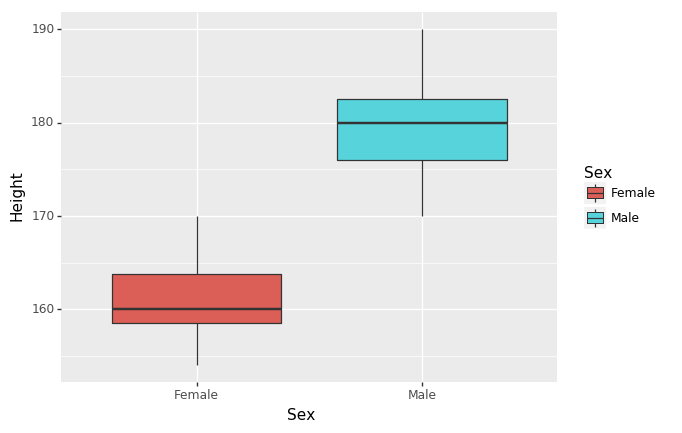

<ggplot: (-9223372029302447630)>

In [41]:
(p9.ggplot(df)+ p9.aes(x='Sex',y='Height', fill='Sex')+ p9.geom_boxplot())

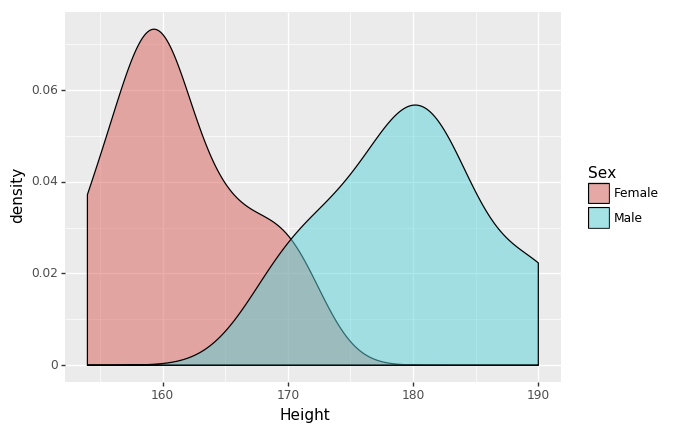

<ggplot: (-9223372029302291880)>

In [43]:
(p9.ggplot(df)+ p9.aes(x='Height', fill='Sex') + p9.geom_density(alpha=0.5))

In [37]:
a = df[df['Sex'] == 'Male']
b = df[df['Sex'] == 'Female']
a = a['Height']
b = b['Height']

In [39]:
print("a.mean:", a.mean())
print("b.mean:", b.mean())

a.mean: 179.66666666666666
b.mean: 161.16666666666666


In [40]:
t, p = stats.ttest_ind(a, b)
print("t:\t", t, "p:\t", p)

t:	 5.116783214407117 p:	 0.0004528070461878801


### T-test - Does our new ad. work better than older one!

In [26]:
df = pd.read_csv('advertisement_clicks.csv')
df.head()

,advertisement_id,action
0,B,1
1,B,1
2,A,0
3,B,0
4,A,1


In [27]:
a = df[df['advertisement_id'] == 'A']
b = df[df['advertisement_id'] == 'B']
a = a['action']
b = b['action']

In [28]:
print("a.mean:", a.mean())
print("b.mean:", b.mean())

a.mean: 0.304
b.mean: 0.372


In [29]:
t, p = stats.ttest_ind(a, b)
print("t:\t", t, "p:\t", p)

t:	 -3.2211732138019786 p:	 0.0012971905467125246


### Chi-Squared Test

Check if the difference in the click-through-rates is statitically significant or not.

In [30]:
from scipy.stats import chi2, chi2_contingency

In [31]:
def get_p_value(T):
  # same as scipy.stats.chi2_contingency(T, correction=False)
  det = T[0,0]*T[1,1] - T[0,1]*T[1,0]
  c2 = float(det) / T[0].sum() * det / T[1].sum() * T.sum() / T[:,0].sum() / T[:,1].sum()
  p = 1 - chi2.cdf(x=c2, df=1)
  return p

In [20]:
A_clk = a.sum()
A_noclk = a.size - a.sum()

B_clk = b.sum()
B_noclk = b.size - b.sum()

In [21]:
T = np.array([[A_clk, A_noclk], [B_clk, B_noclk]])
print (T)

[[304 696]
 [372 628]]


In [22]:
print(get_p_value(T))

0.0013069502732125926
